In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import scipy.stats as stats

In [38]:
#Generate a synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42) #Make_regression nos ayuda a hacer un dataset sintético

#Split dataset into trining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict the values using the test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Residuals')

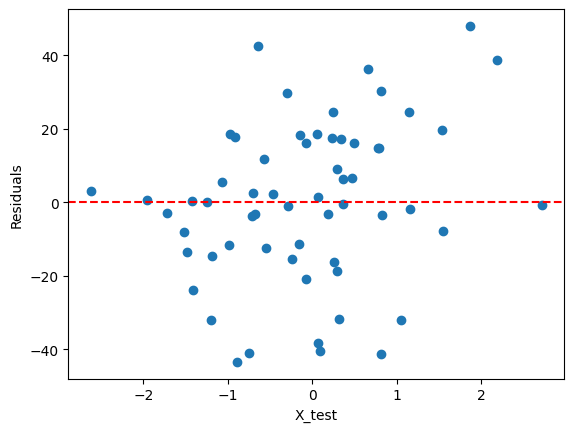

In [40]:
#Residuals
residuals = y_test - y_pred

#Plot the residuals
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X_test')
plt.ylabel('Residuals')

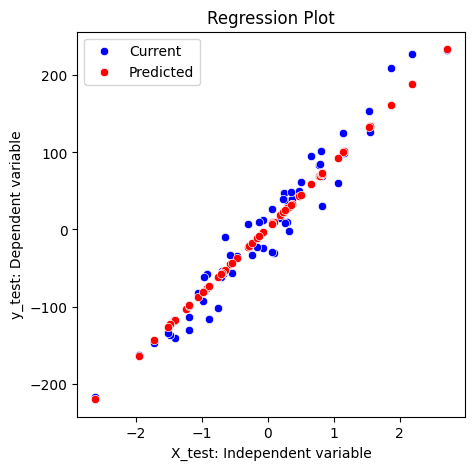

In [41]:
# Plotting data and regression
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label="Current", color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_pred, label="Predicted", color='red')
plt.xlabel('X_test: Independent variable')
plt.ylabel('y_test: Dependent variable')
plt.title('Regression Plot')
plt.legend()
plt.show()

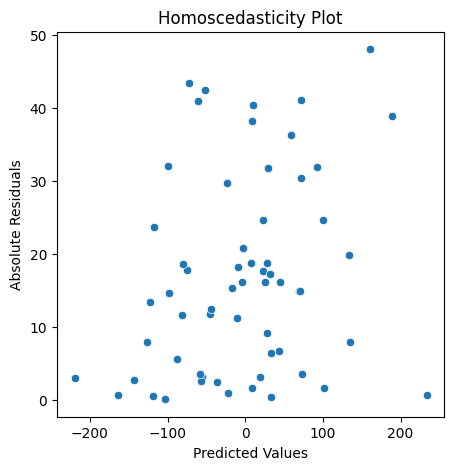

In [42]:
# Plot: Homoscedasticity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

In [43]:
# Generate dataset
np.random.seed(42)
X_example = np.random.rand(200, 1) * 100
y_example = 2 * X_example.squeeze() + np.random.normal(0,X_example.squeeze(), 200)

# Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X_example, y_example, test_size=0.3, random_state=42)

# Train a model
model_h = LinearRegression()
model_h.fit(X_train, y_train)
y_pred_h = model_h.predict(X_test)

<Axes: >

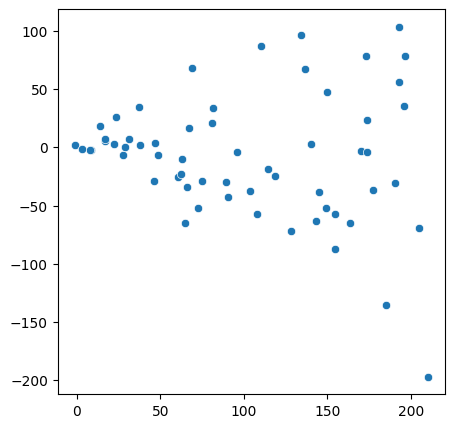

In [44]:
# Plot residual
residuals_h = y_test - y_pred_h
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred_h, y=residuals_h)

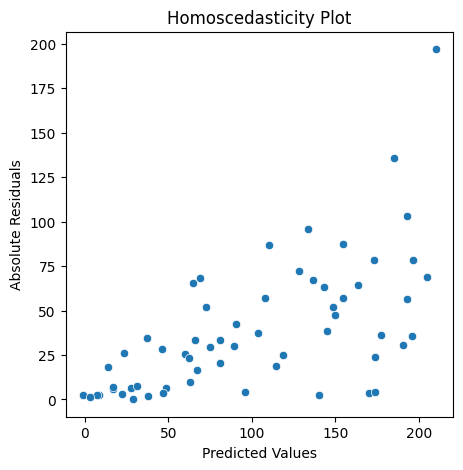

In [45]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred_h, y=np.abs(residuals_h))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

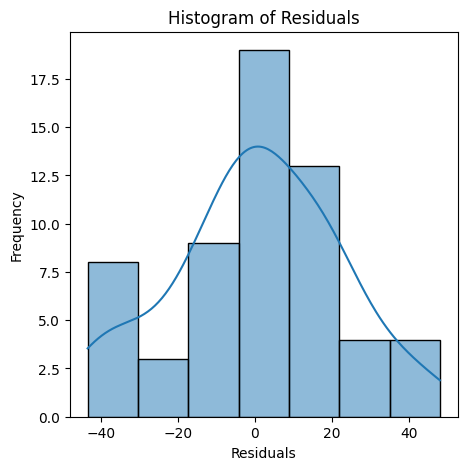

In [46]:
#Plot normality of residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

<Figure size 500x500 with 0 Axes>

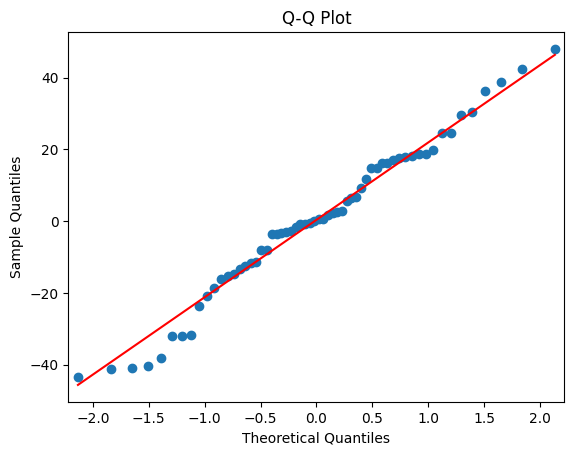

In [47]:
# Plot Q-Q plot
plt.figure(figsize=(5, 5))
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()

#DATASET WINE

In [48]:
# Dataset
def cargar_dataset_vinos(url: str) -> pd.DataFrame:
    return pd.read_csv(url, delimiter=';')
fuente_uci = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

vinos_df = cargar_dataset_vinos(fuente_uci)
vinos_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


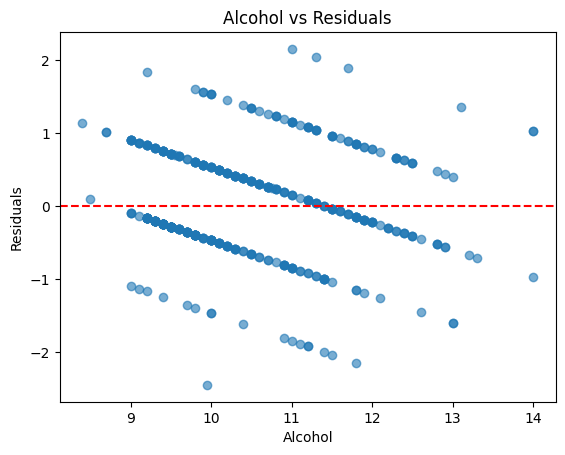

In [49]:
# Define variables
X = vinos_df[["alcohol"]]
y = vinos_df["quality"]

# Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model_w = LinearRegression()
model_w.fit(X_train, y_train)

# Predict the values
y_pred_w = model_w.predict(X_test)

# Residuals
residuals_w = y_test - y_pred_w

plt.scatter(X_test, residuals_w, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Alcohol")
plt.ylabel("Residuals")
plt.title("Alcohol vs Residuals")
plt.show()

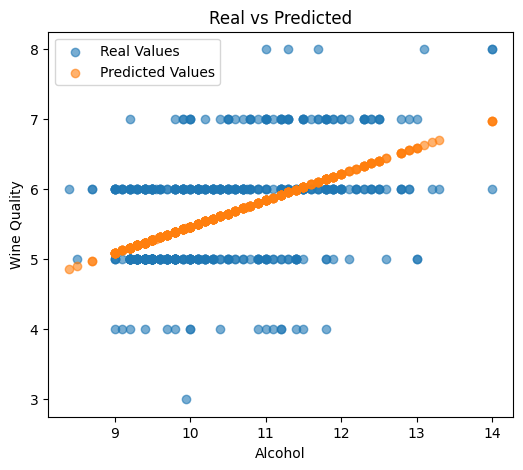

In [50]:
plt.figure(figsize=(6,5))

# Real points
plt.scatter(X_test["alcohol"], y_test, alpha=0.6, label="Real Values")

# Predict points
plt.scatter(X_test["alcohol"], y_pred_w, alpha=0.6, label="Predicted Values")

plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Real vs Predicted")
plt.legend()
plt.show()

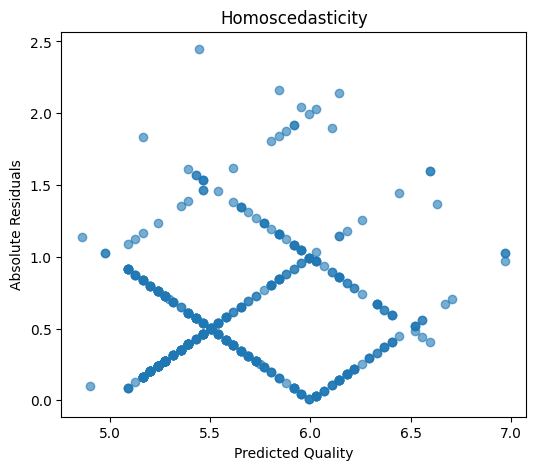

In [51]:
# Homoscedasticity

abs_residuals = np.abs(residuals_w)
plt.figure(figsize=(6,5))

plt.scatter(y_pred_w, abs_residuals, alpha=0.6)

plt.xlabel("Predicted Quality")
plt.ylabel("Absolute Residuals")
plt.title("Homoscedasticity")
plt.show()


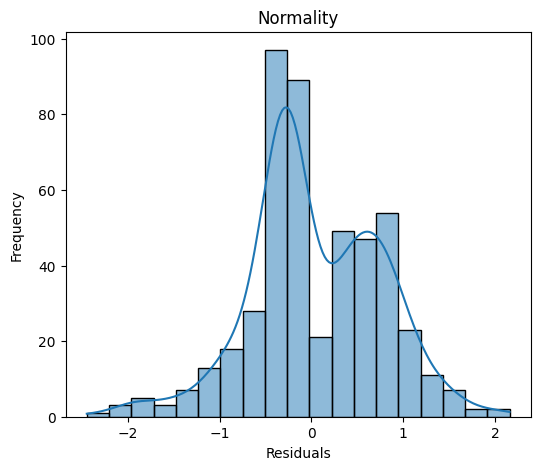

In [52]:
# Normality

plt.figure(figsize=(6,5))
sns.histplot(residuals_w, kde=True, edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality")
plt.show()

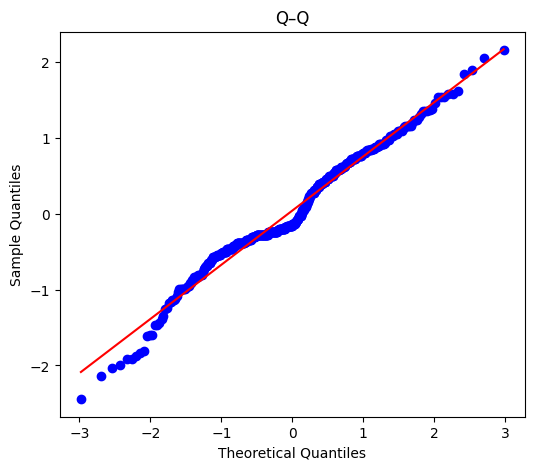

In [54]:
# Q–Q Plot
plt.figure(figsize=(6,5))
stats.probplot(residuals_w, dist="norm", plot=plt)
plt.title("Q–Q")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()
